In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import PIL
import os
from PIL import Image, ImageOps
import glob
import cv2

In [ ]:
import os, re, glob, cv2, numpy as np

dirs = os.listdir('/content/drive/MyDrive/Augmentasi/kupu_kupu/rotate')
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/drive/MyDrive/Augmentasi/kupu_kupu/rotate/'+i+'/*'):
        im = cv2.imread(pic)
        im = cv2.resize(im,(224,224))
        im = np.array(im)
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 10):
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X = np.array(X)
y = np.array(y);

Jumlah kupu_batik_cap : 200
Jumlah kupu_hijau_biru : 200
Jumlah kupu_jarak : 200
Jumlah kupu_jojo : 200
Jumlah kupu_pantat_merah : 200
Jumlah kupu_raja_helena : 200
Jumlah kupu_raja_limau : 200
Jumlah kupu_harimau_kuning_hijau : 200


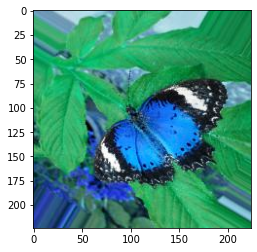

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[1])

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.70, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_other, y_other, test_size=0.666, random_state=42)
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
y_train = to_categorical(y_train, len(dirs))
y_valid = to_categorical(y_valid, len(dirs))
y_test = to_categorical(y_test, len(dirs))
print("Found "+str(X_train.shape[0])+" trained image filenames belonging "+str(len(dirs))+" class")
print("Found "+str(X_valid.shape[0])+" validated image filenames belonging "+str(len(dirs))+" class")
print("Found "+str(X_test.shape[0])+" tested image filenames belonging "+str(len(dirs))+" class")

Found 1120 trained image filenames belonging 8 class
Found 160 validated image filenames belonging 8 class
Found 320 tested image filenames belonging 8 class


In [ ]:
input_shape = (224, 224, 3)
base_model=tf.keras.applications.MobileNet(input_shape=input_shape,
                                          # dropout=0.001,
                                           include_top=False,
                                           weights='imagenet')

17235968/17225924 [==============================] - 1s 0us/step


In [ ]:

base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:

model = tf.keras.Sequential([
                             base_model,
                             tf.keras.layers.Conv2D(32,3, activation='relu'),
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dense(8,activation='softmax')
])



In [ ]:
from tensorflow.keras.optimizers import Adam
epochs =10
lrate = 0.001
adam = Adam(learning_rate=lrate)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 32)          294944    
                                                                 
 global_average_pooling2d (G  (None, 32)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
Total params: 3,524,072
Trainable params: 3,502,184
Non-trainable params: 21,888
_________________________________________________________________


In [ ]:
#tanpa augmentasi
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
35/35 [==============================] - 22s 211ms/step - loss: 0.4436 - accuracy: 0.8902 - val_loss: 3.6337 - val_accuracy: 0.5625
Epoch 2/10
35/35 [==============================] - 7s 198ms/step - loss: 0.0839 - accuracy: 0.9768 - val_loss: 5.4050 - val_accuracy: 0.6406
Epoch 3/10
35/35 [==============================] - 7s 194ms/step - loss: 0.0285 - accuracy: 0.9929 - val_loss: 4.0629 - val_accuracy: 0.7188
Epoch 4/10
35/35 [==============================] - 7s 194ms/step - loss: 0.0256 - accuracy: 0.9937 - val_loss: 0.3074 - val_accuracy: 0.8844
Epoch 5/10
35/35 [==============================] - 7s 199ms/step - loss: 0.0349 - accuracy: 0.9902 - val_loss: 2.6458 - val_accuracy: 0.7281
Epoch 6/10
35/35 [==============================] - 7s 203ms/step - loss: 0.1671 - accuracy: 0.9625 - val_loss: 5.1615 - val_accuracy: 0.5281
Epoch 7/10
35/35 [==============================] - 7s 198ms/step - loss: 0.0715 - accuracy: 0.9768 - val_loss: 2.0820 - val_accuracy: 0.7000
Epoch

In [ ]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1,)

print('\nTest accuracy:', test_acc)

10/10 [==============================] - 0s 43ms/step - loss: 0.1298 - accuracy: 0.9625

Test accuracy: 0.9624999761581421


In [ ]:
train_loss, train_acc = model.evaluate(X_train,  y_train, verbose=1)

print('\nTrain accuracy:', train_acc)

35/35 [==============================] - 1s 38ms/step - loss: 0.1730 - accuracy: 0.9696

Train accuracy: 0.9696428775787354


In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

<Figure size 432x288 with 0 Axes>

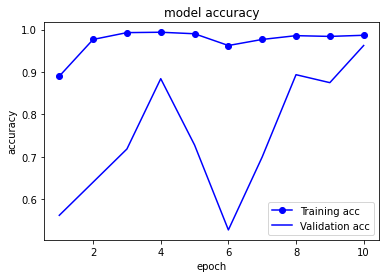

In [ ]:
plot_epochs = range(1, len(acc)+1)
# Accuracy
plt.plot(plot_epochs, acc, 'bo-', label='Training acc')
plt.plot(plot_epochs, val_acc, 'b', label='Validation acc')
plt.title('model accuracy')
plt.ylabel('accuracy')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

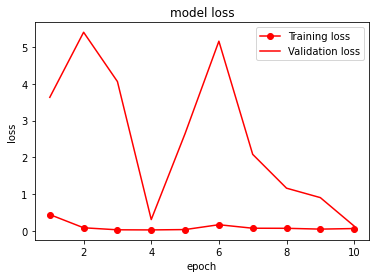

In [ ]:
plot_epochs = range(1, len(loss)+1)
# Accuracy
plt.plot(plot_epochs, loss, 'ro-', label='Training loss')
plt.plot(plot_epochs, val_loss, 'r', label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_n, y_prediction_n, 
                            target_names=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"]))

                           precision    recall  f1-score   support

kupu_harimau_kuning_hijau       1.00      0.86      0.93        37
         kupu_raja_helena       0.96      0.98      0.97        50
          kupu_hijau_biru       1.00      0.95      0.97        40
           kupu_batik_cap       0.91      1.00      0.95        39
               kupu_jarak       0.89      1.00      0.94        33
          kupu_raja_limau       0.97      0.97      0.97        38
                kupu_jojo       0.98      0.96      0.97        45
        kupu_pantat_merah       1.00      0.97      0.99        38

                 accuracy                           0.96       320
                macro avg       0.96      0.96      0.96       320
             weighted avg       0.97      0.96      0.96       320



In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred


array([4, 7, 3, 5, 4, 1, 0, 6, 5, 7, 3, 4, 2, 0, 0, 2, 7, 4, 7, 1, 2, 3,
       6, 6, 4, 4, 1, 3, 3, 2, 2, 5, 1, 6, 6, 0, 4, 1, 6, 1, 6, 1, 5, 5,
       0, 3, 1, 7, 7, 5, 2, 7, 1, 2, 6, 3, 6, 4, 3, 6, 1, 3, 7, 7, 1, 3,
       3, 3, 7, 1, 7, 7, 5, 4, 3, 1, 4, 6, 6, 5, 5, 0, 1, 0, 5, 1, 7, 1,
       6, 7, 2, 4, 4, 2, 5, 1, 7, 0, 5, 7, 6, 3, 6, 0, 7, 1, 7, 7, 6, 2,
       1, 1, 7, 0, 5, 2, 5, 0, 1, 4, 4, 3, 3, 1, 1, 7, 1, 4, 4, 1, 3, 4,
       1, 1, 6, 5, 1, 7, 1, 0, 0, 7, 6, 0, 2, 1, 7, 4, 5, 3, 6, 5, 4, 1,
       0, 3, 3, 2, 2, 1, 2, 2, 5, 0, 2, 2, 3, 6, 3, 0, 1, 7, 5, 1, 2, 5,
       3, 3, 5, 3, 3, 1, 5, 6, 3, 2, 0, 6, 3, 5, 1, 6, 5, 4, 1, 6, 4, 3,
       6, 2, 2, 2, 7, 0, 1, 2, 4, 6, 6, 2, 7, 3, 2, 4, 6, 6, 4, 1, 7, 2,
       1, 6, 5, 7, 2, 6, 4, 5, 1, 7, 7, 5, 2, 0, 4, 6, 1, 4, 2, 0, 3, 0,
       6, 0, 6, 1, 3, 6, 2, 6, 3, 0, 5, 3, 7, 3, 4, 3, 1, 0, 0, 0, 4, 1,
       3, 2, 5, 3, 1, 6, 6, 5, 6, 0, 6, 1, 1, 0, 2, 5, 0, 3, 1, 5, 2, 7,
       4, 6, 0, 2, 7, 6, 5, 0, 5, 3, 6, 5, 4, 3, 3,

In [ ]:
y_test_class = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.9625


array([[32,  0,  0,  1,  4,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 38,  2,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 37,  0,  0],
       [ 0,  2,  0,  0,  0,  0, 43,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 37]])

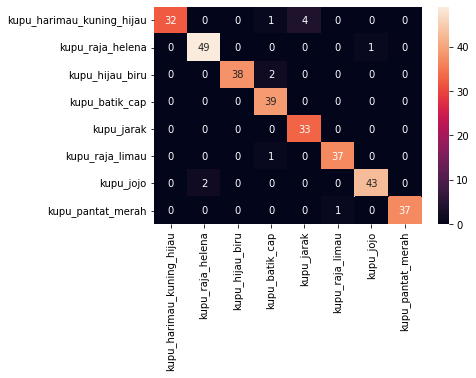

In [ ]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"], 
           yticklabels=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"])

In [ ]:
y_pred = model.predict(X_valid)
y_prediction_n = []
y_valid_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_valid[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_valid[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_valid_n.append(index_m)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid_n, y_prediction_n, target_names=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"]))

                           precision    recall  f1-score   support

kupu_harimau_kuning_hijau       1.00      0.95      0.97        20
         kupu_raja_helena       1.00      0.89      0.94        18
          kupu_hijau_biru       1.00      1.00      1.00        29
           kupu_batik_cap       0.95      1.00      0.97        18
               kupu_jarak       0.93      1.00      0.97        14
          kupu_raja_limau       0.88      0.96      0.92        23
                kupu_jojo       1.00      1.00      1.00        24
        kupu_pantat_merah       1.00      0.93      0.96        14

                 accuracy                           0.97       160
                macro avg       0.97      0.97      0.97       160
             weighted avg       0.97      0.97      0.97       160

